In [1]:
#%pip install pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ruta = '/Users/ferleon/Github/semestre_v/ciencia_de_datos_aplicada_a_la_economia/data/Bitcoin_4_30_2024-6_29_2024_historical_data_coinmarketcap.csv'
data_frame = pd.read_csv(ruta, sep=';')

In [3]:


data_frame['timeClose'] = pd.to_datetime(data_frame['timeClose']) 

In [4]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeClose  484 non-null    datetime64[ns, UTC]
 1   close      484 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 7.7 KB


In [5]:
def rendimiento(precio_inicial,precio_final):
    return (precio_final - precio_inicial) / precio_inicial


def rendimiento_logaritmico(precio_inicial, precio_final):
    import numpy as np
    return np.log(precio_final / precio_inicial)

In [6]:
# Precios
# precios = [100, 105, 102, 107, 110]

# rendimiento_list = []

# for i in range(len(precios)-1):
#     prec_inc = precios[i]
#     prec_fin = precios[i+1]
#     rendimiento_list.append(rendimiento(prec_inc,prec_fin))

#print(f"Rendimientos ejemplo: {rendimiento_list}")


# precios_close = pd.to_numeric(data_frame["close"], errors="coerce")


serie_precios = pd.Series(data_frame["close"])
serie_precios = serie_precios.dropna()


def rendimiento_logaritmico_shift(precios):
    return np.log(precios / precios.shift(1))


def rendimiento_simple_shift(precios):
    return precios.pct_change()

# Metodo 2 con .shift()
rendimiento_bitcoin_shift_list = [rendimiento_simple_shift(serie_precios)]
rendimiento_bitcoin_shift_list = rendimiento_bitcoin_shift_list[0].dropna()
print(rendimiento_bitcoin_shift_list[:10])

rendimiento_logaritmico_shift_list = [rendimiento_logaritmico_shift(serie_precios)]
rendimiento_logaritmico_shift_list = rendimiento_logaritmico_shift_list[0].dropna()
print(rendimiento_logaritmico_shift_list[:10])


print(f"Primeros 10 rendimientos de Bitcoin: {rendimiento_bitcoin_shift_list[:10]}")



1    -0.011753
2     0.005220
3    -0.015011
4     0.030276
5     0.016886
6     0.012999
7    -0.038118
8     0.016507
9    -0.012632
10    0.030321
Name: close, dtype: float64
1    -0.011823
2     0.005207
3    -0.015125
4     0.029826
5     0.016745
6     0.012915
7    -0.038864
8     0.016372
9    -0.012713
10    0.029870
Name: close, dtype: float64
Primeros 10 rendimientos de Bitcoin: 1    -0.011753
2     0.005220
3    -0.015011
4     0.030276
5     0.016886
6     0.012999
7    -0.038118
8     0.016507
9    -0.012632
10    0.030321
Name: close, dtype: float64


Text(0.5, 1.0, 'Precio Cierre Bitcoin | UN AÑO')

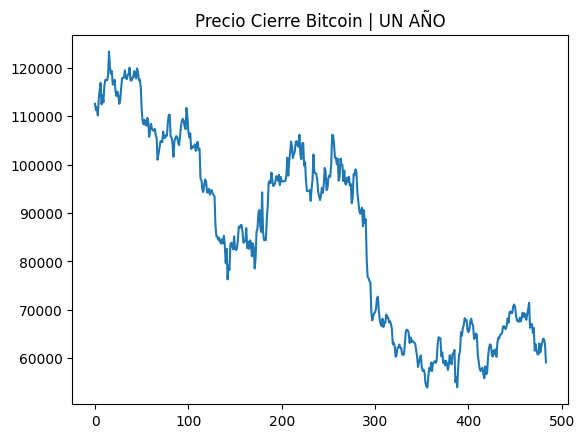

In [7]:
plt.plot(serie_precios, label="Precio Cierre Bitcoin")
plt.title("Precio Cierre Bitcoin | UN AÑO")

Text(0.5, 1.0, 'Rendimiento Bitcoin | RENDIMIENTO SIMPLE')

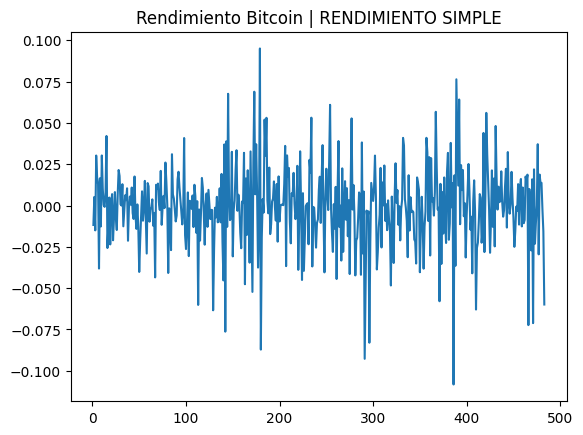

In [8]:
plt.plot(rendimiento_bitcoin_shift_list, label="Rendimiento Bitcoin")
plt.title("Rendimiento Bitcoin | RENDIMIENTO SIMPLE")

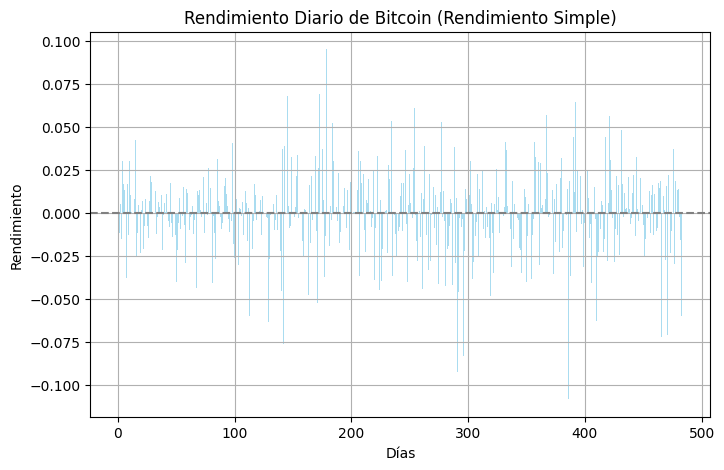

In [9]:
# Rendimiento profe



plt.figure(figsize=(8, 5))
plt.bar(range(1,len(rendimiento_bitcoin_shift_list)+1), rendimiento_bitcoin_shift_list, color='skyblue', alpha=0.7)

plt.title("Rendimiento Diario de Bitcoin (Rendimiento Simple)")
plt.xlabel("Días")
plt.ylabel("Rendimiento")
plt.axhline(0,color='gray', linestyle='--')
plt.grid(True)

Text(0.5, 1.0, 'Rendimiento Bitcoin | RENDIMIENTO LOGARÍTMICO')

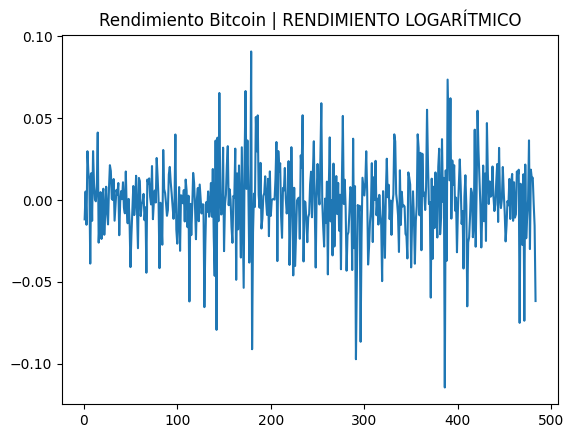

In [10]:
plt.plot(rendimiento_logaritmico_shift_list, label="Rendimiento Logarítmico Bitcoin")
plt.title("Rendimiento Bitcoin | RENDIMIENTO LOGARÍTMICO")

In [11]:
# Desviación estándar
desviacion_estandar = pd.Series(rendimiento_bitcoin).std()
print(f"Desviación Estándar Rendimiento Bitcoin: {desviacion_estandar}")




NameError: name 'rendimiento_bitcoin' is not defined